## INIT
---

In [1]:
from net4 import ImpactNetV4, M, create_default_net
import numpy as np
import utils as u
import pickle
import matplotlib.pyplot as plt
from skimage.viewer import ImageViewer
from skimage import io
from utils import get_images
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2grey
import numpy as np
from sklearn.preprocessing import normalize
%matplotlib inline
data = [
    {
        'value_2d': image['value'].reshape(M, M),
        'value': image['value'],
        'label': image['label']
    } for image in u.get_image_data('medium')
]

def save(path, image): io.imsave(path, image)

def scatter(data):
    plt.scatter([i for i in range(len(data))], data)

---


In [ ]:
net = ImpactNetV2(M, learning_rate, length, hidden_layer_size, u.get_image_data())
net.train()
pickle.dump(net, open('trained_net2.pickle', 'wb'))

## Train various nets, output their results

In [ ]:
nets = []
for i in range(100):
    new_net = create_default_net()
    new_net.train(False)
    counter_correct = 0
    result_total = 0
    plot_data = []
    for image in data:
        result = new_net.evaluate(image['value'])
        result_total += result
        plot_data.append(result)

        verdict = "negative"
        if result > 0.5: verdict == "positive"

        assesment = 'WRONG'
        if verdict == image['label']:
            counter_correct += 1
            assesment = 'CORRECT'

        # print(f'{result}: {verdict}\nlabel: {image["label"]}\nassesment: {assesment}')
        # plt.imshow(image['value_2d'])
        # plt.show()
    # print(f'accuracy: {counter_correct / len(data)}\nmean result: {result_total / len(data)}\nstd:{np.std(plot_data)}')
    # plt.scatter([i for i in range(len(plot_data))], plot_data)
    # plt.show()
    nets.append({
        'net': new_net,
        'std': np.std(plot_data),
        'accuracy': counter_correct / len(data),
        'mean_result': result_total / len(data),
        'plot_data': plot_data
    })
for net in nets: 
    print(f"NET NUMBER {nets.index(net)}\naccuracy: {net['accuracy']}\nmean result: {net['mean_result']}\nstd: {net['std']}")
    plt.scatter([i for i in range(len(net['plot_data']))], net['plot_data'])
    plt.show()

## Retrain the same net multiple times, output the results

In [ ]:
nets = []
new_net = create_default_net()
for i in range(100):
    new_net.train(False)
    counter_correct = 0
    result_total = 0
    plot_data = []
    for image in data:
        result = new_net.evaluate(image['value'])
        result_total += result
        plot_data.append(result)

        verdict = "negative"
        if result > 0.5: verdict == "positive"

        assesment = 'WRONG'
        if verdict == image['label']:
            counter_correct += 1
            assesment = 'CORRECT'

        # print(f'{result}: {verdict}\nlabel: {image["label"]}\nassesment: {assesment}')
        # plt.imshow(image['value_2d'])
        # plt.show()
    # print(f'accuracy: {counter_correct / len(data)}\nmean result: {result_total / len(data)}\nstd:{np.std(plot_data)}')
    # plt.scatter([i for i in range(len(plot_data))], plot_data)
    # plt.show()
    nets.append({
        'net': new_net,
        'std': np.std(plot_data),
        'accuracy': counter_correct / len(data),
        'mean_result': result_total / len(data),
        'plot_data': plot_data
    })
for net in nets: 
    print(f"NET NUMBER {nets.index(net)}\naccuracy: {net['accuracy']}\nmean result: {net['mean_result']}\nstd: {net['std']}")
    plt.scatter([i for i in range(len(net['plot_data']))], net['plot_data'])
    plt.show()

In [ ]:
# for i in range(1, len(net.weights)):
#     for j in range(len(net.weights[i])):
#         #print(net.weights[i][j])
#         plt.scatter(i, np.mean(net.weights[i][j]))
# Make an array with ones in the shape of an 'X'
import matplotlib.cm as cm
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

for i in net.weights[1:len(net.weights)]:
    fig, ax = plt.subplots()
    ax.imshow(i, interpolation='nearest', cmap=cm.Greys_r)
    set_size(10,150)
    plt.show()

In [ ]:
from skimage.exposure import adjust_gamma
for image in data:
    adjusted = adjust_gamma(image['value_2d'], 3)
    plt.imshow(image['value_2d'], cmap='gray')
    plt.show()
    plt.imshow(adjusted, cmap='gray')
    plt.show()

In [ ]:
for i in range(100): stdest_net.train(False)
counter_correct = 0
result_total = 0
plot_data = []
for image in data:
    result = new_net.evaluate(image['value'])
    result_total += result
    plot_data.append(result)

    verdict = "negative"
    if result > 0.5: verdict == "positive"

    assesment = 'WRONG'
    if verdict == image['label']:
        counter_correct += 1
        assesment = 'CORRECT'

    # print(f'{result}: {verdict}\nlabel: {image["label"]}\nassesment: {assesment}')
    # plt.imshow(image['value_2d'])
    # plt.show()
print(f'accuracy: {counter_correct / len(data)}\nmean result: {result_total / len(data)}\nstd:{np.std(plot_data)}')
plt.scatter([i for i in range(len(plot_data))], plot_data)
plt.show()

# WHY? I DON'T UNDERSTAND.

### Cool nets
1. 68 - the 1est one
2. 65 - the stdest one

In [ ]:
net = create_default_net(cost_function_type='cross-entropy')
cost_over_training_examples = []
def per_example_logging_callback(net, result):
    cost_over_training_examples.append(net.cost(net.evaluate(result['values']['activations'][0]), result['label'])['value'])
net.train(logging=False, per_example_logging_callback=per_example_logging_callback)
scatter(cost_over_training_examples)

--------------------------
<br><br><br><br><br><br><br><br><br><br><br><br>
--------------------------
# MISC AREA
## VERY CHAOTIC PROCEED WITH CAUTION

## WHITENESS EMPHASIZER

In [2]:
from net4 import ImpactNetV4, M, create_default_net
import numpy as np
import utils as u
import pickle
import matplotlib.pyplot as plt
from skimage.viewer import ImageViewer
from skimage import io
from utils import get_images
import matplotlib.pyplot as plt
from skimage.color import rgb2gray, rgb2grey
import numpy as np
from sklearn.preprocessing import normalize
from scipy.fftpack import fft
%matplotlib inline

def max_acc(m):
    return acc(knife_matrix(m))

def knife_matrix(m):
    import numpy as np
    out = []
    for i in range(m):
        row = np.array([])
        if i % 2 == 0: row = [0 for j in range(m)]
        else: row = [1 for j in range(m)]
        out.append(row)
    return np.array(out)

def acc(im):
    acutance = 0
    # print(im.shape)
    w = im.shape[0]
    l = im.shape[1]
    for row in range(len(im)):
        for col in range(len(im[row])): # For each pixel
            local_acutance = 0
            ref = im[row][col] # Magnitude of value current pixel, reference value

            for i in [row-1, row, row+1]:
                for j in [col-1, col, col+1]:
                    if not ( (i < 0) or (i > w - 1) or (j < 0) or (j > l - 1) or (i == row and j == col) ):
                        # These for loops and if statement go through all the row, col coordinates of the neighboring pixels
                        local_acutance += abs(ref - im[i][j])
            acutance += local_acutance
    return acutance

def gradient_array(arr):
    out = arr[:]
    for i in range(1, len(arr)):
        out[i] = arr[i] - arr[i-1]
    out[0] = out[1]
    return out

def show(im): plt.imshow(im, cmap='gray'); plt.show()
def plot(dat): plt.plot(dat); plt.show()

data = []
accut = lambda m: 6*(m**2)-(10*m)+4

def rgb2gray_emph_whiteness(image, n=6, k=4):
    m = ( (10**k) / ((255*3)**n) )
    f = lambda x: m * (x**n)
    to_gray = []
    for row in image:
        out_row = [
            f(np.sum(col)) / 10000 for col in row
        ]
        to_gray.append(out_row)
    to_gray = np.array(to_gray)
    return to_gray

def emphasize_3rd_quarter(dist):
    # Most of the impact-like gradient changes tend to happen in around the half to 3/4 region of the magnitude distribution
    d = dist[:]
    for i in range(len(dist)):
        if not (((i / len(dist)) >= 0.5) and ((i / len(dist)) <= 0.75)):
            d[i] = 0
    return d

## ACUTANCE EMPHASIZER

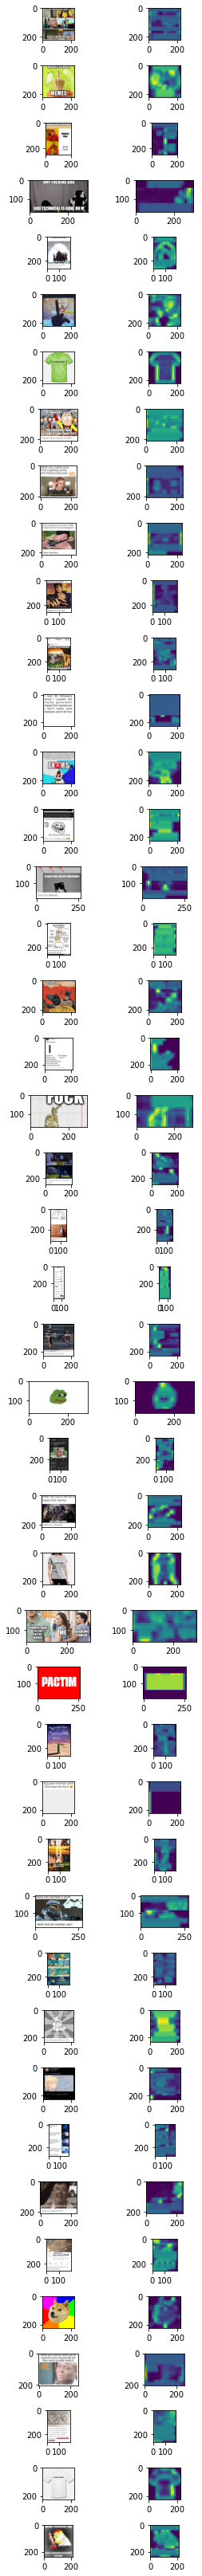

In [3]:
def acutance_map(image, r=0.05):
    image = rgb2gray_emph_whiteness(image[:])
    countc = 0
    countr = 0
    w = image.shape[0] # Width
    l = image.shape[1] # Length
    #print(count)
    s=100
    r = int(r * (w + l) / 2) # Radius is proportional to average of height and width.
    acutance_map = np.zeros_like(image)

    regions = []
    gradients = []
    counter = 0

    for row in range(0, len(image), r):
        for col in range(0, len(image[row]), r):
            region = image[
                max(0, row - r) : min(w - 1, row + r), # Ensures that indices are within range.
                max(0, col - r) : min(l - 1, col + r)
            ]

            gradient = np.gradient(np.sort(rgb2gray(region).flatten())) # all of the pixels sorted from lowest to highest brightness
            avg_gradient = np.mean(abs(gradient)) # take mean gradient of the 
            #plot(gradient)
            #plot(fft(gradient))
            #show(region)
            regions.append(region)
            gradients.append(gradient)
            
            acutance_map[
                max(0, row - r) : min(w - 1, row + r),
                max(0, col - r) : min(l - 1, col + r)
            ] += avg_gradient*100
    return normalize(acutance_map)

image = rgb2gray_emph_whiteness(io.imread('images/net_images_whole/357.png'))
#print(image)
images = get_images()

maps = []
for image in images: maps.append(acutance_map(image))

fig, axs = plt.subplots(len(images), 2, figsize=(8, len(images)))

for i in range(len(images)):
    axs[i][0].imshow(images[i], cmap='gray')
    axs[i][1].imshow(maps[i])
fig.set_tight_layout(True)
plt.savefig('gradient_maps.png')